In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")


import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from gensim import matutils, models
import scipy.sparse
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# spacy.prefer_gpu()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle


Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
data_df = pd.read_pickle('cleaned_list_df.pickle')
wsb = data_df.T['wsb'].tolist()
data_df
psy = data_df.T['askreddit'].tolist()
psy

['victorias secret was originally supposed to be a place for men to buy lingerie for their wives and not feel embarrassed but now its almost exclusively shopped at by women',
 'the ford mustang  it was supposed to be a car with a big trunk to you could fit all the groceries in it  there was even an ad or article stating that you can own a mustang that matches the color of your lipstick  makes sense why a lot of old mustangs are red',
 'heels if i remember correctly',
 'is this how family feud gets new questions and answers',
 'skirts used to be worn in battle by men for more room to move around',
 'ugg boots were originally worn by male surfers with their girlfriends stealing and wearing them like they would a leather jacket',
 'filtered cigarettes in general but marlboro made the biggest leap in terms of gendered marketing once that whole conspiracy theory came out that like cigarettes are idk bad for you or something and more people switched to filtered cigarettes its filtered that m

In [ ]:
stop_list = ['of', 'it', 'to', 'for', 'you', 'the', 'that', 'if', 'my', 'and', 'in', 'from','going', 'too', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaa', 'aaa', 'aaaaaaaaahhhhhhhhhhhh', 'aaaaaaaand', 'aaaaaaaauuuuuugggghhh', 'aaaaaaafternoon', 'aaaaaaand', 'aaaaaand', 'aaaaall', 'aaaaalllllll', 'aaaaand', 'is', 'are', 'what', 'they', 'we', 'about', 'me', 'have', 'im', 'this', 'yeah','will','can','get','be', 'have','be', 'but']

In [4]:
vec = TfidfVectorizer(stop_words=stop_list)
matrix = vec.fit_transform(psy)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df



,aa,aaaah,aaaahwooooo,aaaall,aaaalll,aaaand,aaaay,aaahsid,aaallrriiight,aaand,...,𝕿𝖔,𝖇𝖊,𝘽𝙊𝘽,𝘽𝙐𝙄𝙇𝘿𝙀𝙍,𝘾𝘼𝙉,𝙁𝙄𝙓,𝙃𝙀,𝙄𝙏,𝙏𝙃𝙀,𝙔𝙀𝙎
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from sklearn.cluster import KMeans

number_of_clusters=20
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

km.fit(idf_df)


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [20]:
idf_df

,aa,abandoned,abandoning,abandonment,abbreviated,abcd,ability,abject,able,ableist,...,zelfmoord,zero,zidenberg,zillion,zone,zoning,zoom,zooming,zuc,zurita
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.081323,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.067398,0.0,0.0,0.0,...,0.0,0.0,0.077900,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101137,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101138,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101139,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: same here time chicks at',
 'Cluster 1: is on be with obama',
 'Cluster 2: why yes thank not do',
 'Cluster 3: are they people is there',
 'Cluster 4: he his was him would',
 'Cluster 5: lol this is was just',
 'Cluster 6: she her was me with',
 'Cluster 7: no heels high one men',
 'Cluster 8: love this with but im',
 'Cluster 9: was but im have not',
 'Cluster 10: hitler adolf would see because',
 'Cluster 11: valentine funny saving money president',
 'Cluster 12: knope leslie she shes parks',
 'Cluster 13: your is with its on',
 'Cluster 14: president ross be bob would',
 'Cluster 15: this is comment one like',
 'Cluster 16: bernie sanders fucking he hes',
 'Cluster 17: sex having had with have',
 'Cluster 18: as is was well be',
 'Cluster 19: me was im this with']

In [8]:
labs = km.labels_
len(km.labels_)

101141

In [ ]:
# idf_df.to_pickle("science_idf_df_with_clusters.pickle")

In [9]:
y = km.labels_

In [10]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=50)
pca.fit(idf_df)
pcafeatures_train = pca.transform(idf_df)

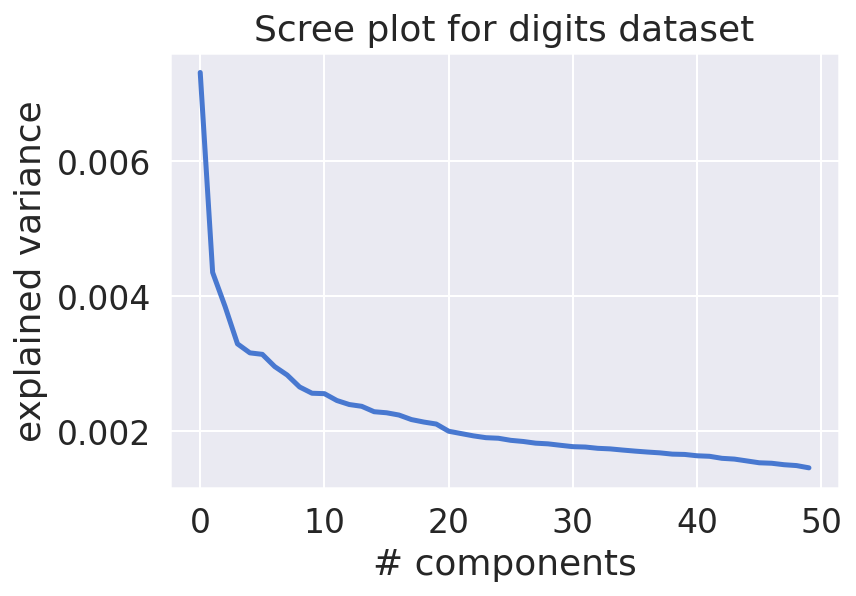

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

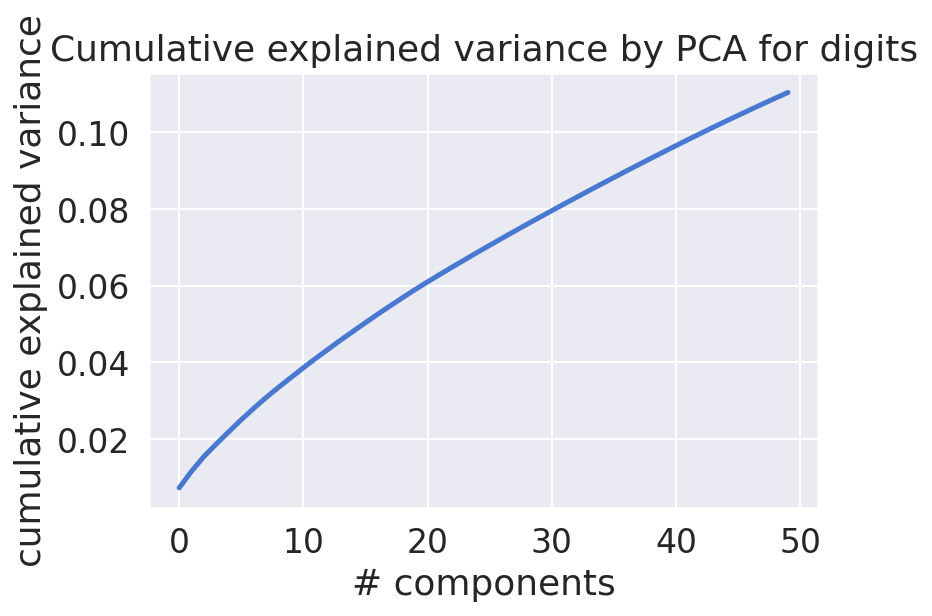

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [17]:
inert = km.inertia_

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

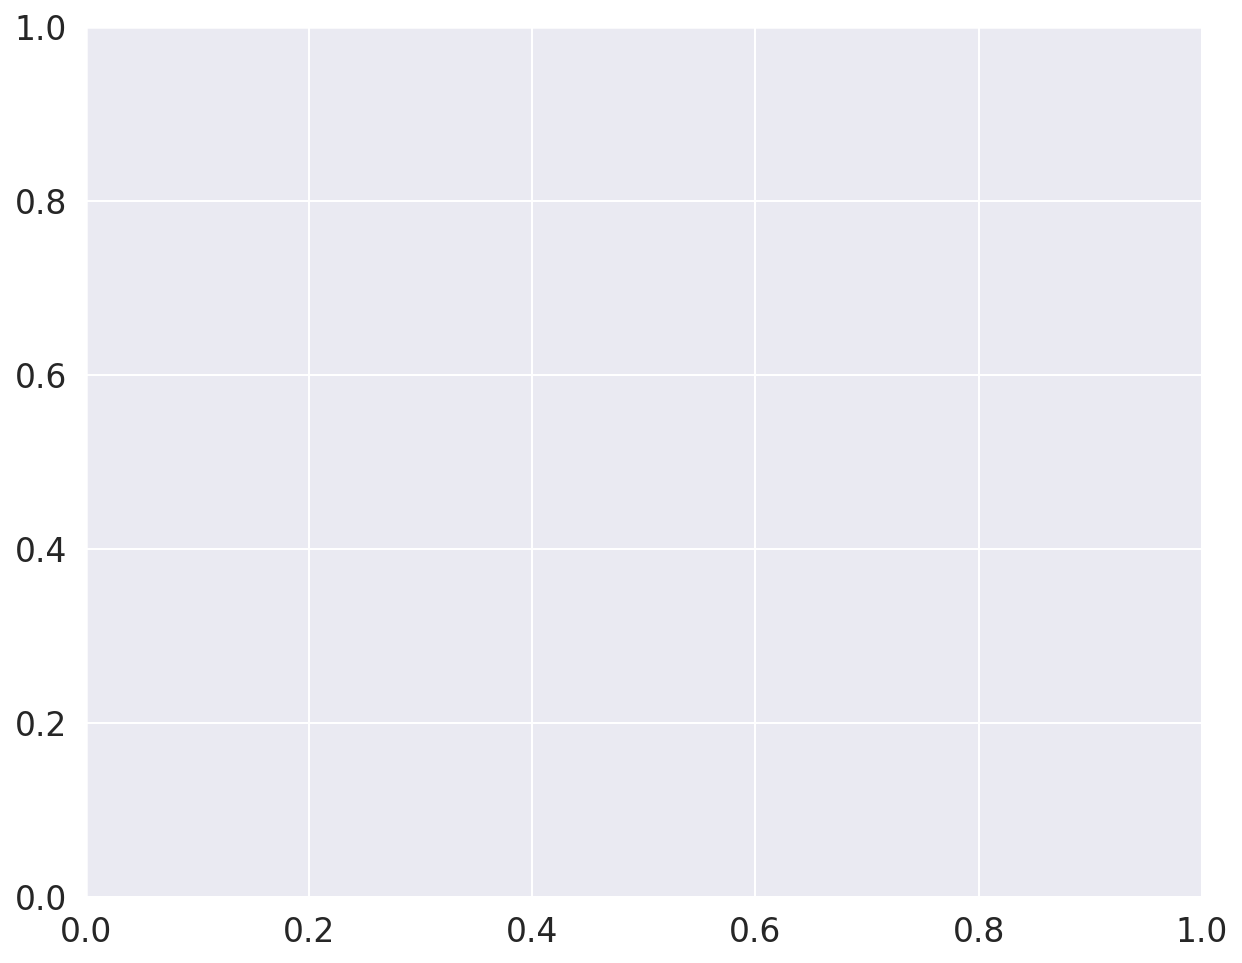

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 51), inert, marker='o', linestyle='--')
plt.xlabel('num clusters')
plt.ylabel('within cluster sum of squares')
plt.show()

In [1]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend(bbox_to_anchor=(1.05, 1))

In [2]:
# plot of all the numbers
plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

NameError: name 'pcafeatures_train' is not defined

In [13]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)


# Import seaborn and matplotlib.patheffects to make nice plots.
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# Random state.
RS = 20200807
# # We first reorder the data points according to the handwritten numbers.
# X = np.vstack([digits.data[digits.target==i]
#                for i in range(10)])
# y = np.hstack([digits.target[digits.target==i]
#                for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(pcafeatures_train)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


IndexError: index 15 is out of bounds for axis 0 with size 10

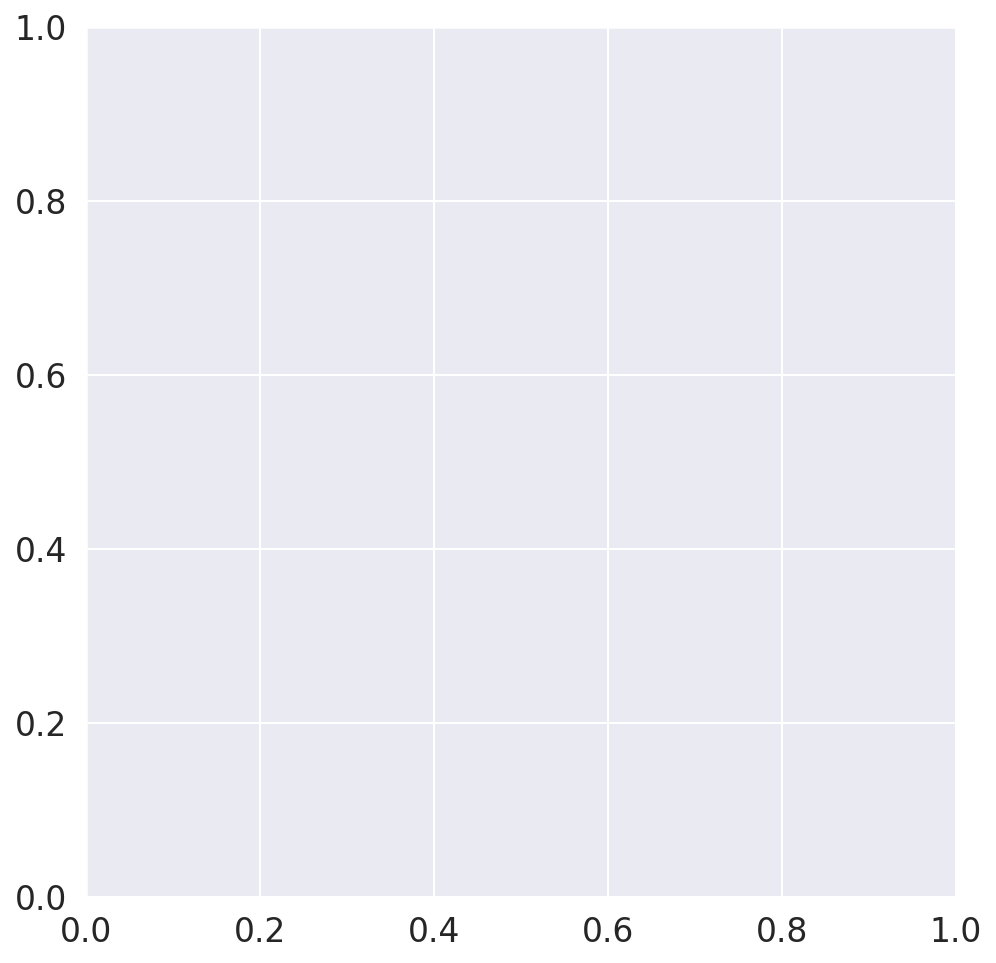

In [14]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
scatter(digits_proj, y)

In [16]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot


labels = km.labels_
centroids = km.cluster_centers_

for i in range(20):
    # select only data observations with cluster label == i
    ds = idf_df[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

result = zip(X , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
sortedR

TypeError: '(array([ 59966,  59967,  59968, ..., 101138, 101139, 101140]),)' is an invalid key

In [8]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: underwater letting near future thanks
Cluster 1: none 𓀐𓂸 formaldehyde form forlorn
Cluster 2: am childbirth you tribe rude
Cluster 3: and for overcook complimented irks
Cluster 4: the is to and this
Cluster 5: freeway rob piling stockpiling trucks
Cluster 6: yes the ah please is
Cluster 7: yields higher due would be
Cluster 8: problems learning along that will
Cluster 9: glasses my contacts wear to
Cluster 10: subgroups asian exclusion students american
Cluster 11: you to the that and
Cluster 12: thats the to of not
Cluster 13: processes chemical density energy much
Cluster 14: charge party insurance shouldnt response
Cluster 15: unemployment benefits we ran get
Cluster 16: dude the to you and
Cluster 17: singular one need mutates nail
Cluster 18: eyes my and it the
Cluster 19: the to of and is


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(wsb_dtm)


In [ ]:
y_kmeans = kmeans.predict(wsb_dtm)

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(wsb_dtm)

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(data_dtmn)
display_cluster(data_dtmn,km,num_clusters)

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(data_dtmn.transpose())
display_cluster(data_dtmn.transpose(),km,num_clusters)